In [17]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import seaborn as sn
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import os
import umap
import pandas as pd
import scipy
from scipy import stats
from scipy.spatial import distance
from scipy.cluster import hierarchy
import networkx as nx


In [18]:
#conda install -c conda-forge pycairo

import igraph as ig
import leidenalg as la

In [19]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [20]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer, Rotator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [21]:
def create_corr_network(G, min_correlation_abs):
    H = G.copy()
##Checks all the edges and removes some based on corr_direction
    for factor1, factor2, weight in G.edges(data=True):
        weight_abs=abs(weight['weight'])
        #print(weight_abs)
        
        if weight_abs < min_correlation_abs or weight_abs==1:
                H.remove_edge(factor1, factor2)
    return H            
       

In [22]:
os.chdir('/Users/jianqiuzhang/Documents/Psychology/HEXACO')

In [23]:
col_keys=pd.read_csv('keys_new12')
col_keys=list(col_keys.iloc[:,1])
print(col_keys)

['HSinc5', 'HMode5', 'HGree10', 'HSinc3', 'HGree4', 'AGent10', 'AGent8', 'HFair7', 'HSinc7', 'EAnxi4', 'EDepe1', 'EAnxi5', 'EAnxi2', 'EAnxi3', 'EAnxi1', 'EAnxi6', 'ESent10', 'EDepe8', 'CPrud3', 'CPrud2', 'COrga1', 'COrga3', 'CPerf2', 'COrga4', 'CDili3', 'CPrud1', 'CDili1', 'XSoci8', 'XSoci1', 'XExpr6', 'XSoci6', 'XSoci3', 'XExpr8', 'XSocB3', 'XSocB2', 'XExpr1', 'OCrea4', 'OCrea8', 'OCrea7', 'OUnco2', 'OInqu4', 'OCrea2', 'OAesA5', 'OCrea1', 'OInqu8', 'AForg4', 'HSinc10', 'APati1', 'AForg1', 'APati3', 'APati2', 'APati5', 'APati4', 'AGent4', 'EFear6', 'EFear8', 'EFear9', 'EFear10', 'EFear5', 'EFear3', 'OInqu2', 'OAesA9', 'OAesA4', 'OInqu9', 'OInqu5', 'HGree2', 'OInqu10', 'AGent2', 'CPrud4', 'CPerf10', 'CPrud5', 'CPrud9', 'OAesA6', 'OAesA10', 'OInqu1', 'OAesA7', 'OInqu3', 'OAesA1', 'ESent6']


In [24]:
#If we need to analyze the orignal 240 item code, use this one
#col_random=pd.read_csv('col_random')
#col_random=list(col_random.iloc[:,1])
#print(col_random)

In [25]:
#Get the code book
code_book = pd.read_table('/Users/jianqiuzhang/Documents/Psychology/HEXACO/codebookItems.txt',delimiter=' I')
code_book.set_index('Code')
code_book.columns=list(['Code','Content'])
codes=list(code_book['Code'])
content=code_book['Content']
code_book.index=codes
code_book.drop(['Code'], axis=1)
code_book.loc['XExpr1']

/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Code             XExpr1
Content     talk a lot.
Name: XExpr1, dtype: object

['1F0', '1F1', '1F2', '1F3', '1F4', '1F5', '1F6', '1F7', '1F8', '1F9', '1F10', '1F11', '2F0', '2F1', '2F2', '2F3', '2F4', '2F5', '2F6', '2F7', '2F8', '2F9', '2F10', '2F11', '3F0', '3F1', '3F2', '3F3', '3F4', '3F5', '3F6', '3F7', '3F8', '3F9', '3F10', '3F11', '4F0', '4F1', '4F2', '4F3', '4F4', '4F5', '4F6', '4F7', '4F8', '4F9', '4F10', '4F11', '5F0', '5F1', '5F2', '5F3', '5F4', '5F5', '5F6', '5F7', '5F8', '5F9', '5F10', '5F11', '6F0', '6F1', '6F2', '6F3', '6F4', '6F5', '6F6', '6F7', '6F8', '6F9', '6F10', '6F11', '7F0', '7F1', '7F2', '7F3', '7F4', '7F5', '7F6', '7F7', '7F8', '7F9', '7F10', '7F11', '8F0', '8F1', '8F2', '8F3', '8F4', '8F5', '8F6', '8F7', '8F8', '8F9', '8F10', '8F11', '9F0', '9F1', '9F2', '9F3', '9F4', '9F5', '9F6', '9F7', '9F8', '9F9', '9F10', '9F11', '10F0', '10F1', '10F2', '10F3', '10F4', '10F5', '10F6', '10F7', '10F8', '10F9', '10F10', '10F11']
          F0        F1        F2        F3        F4        F5        F6  \
0  -0.926015  0.072036  0.066354  0.115861  0.04792

/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


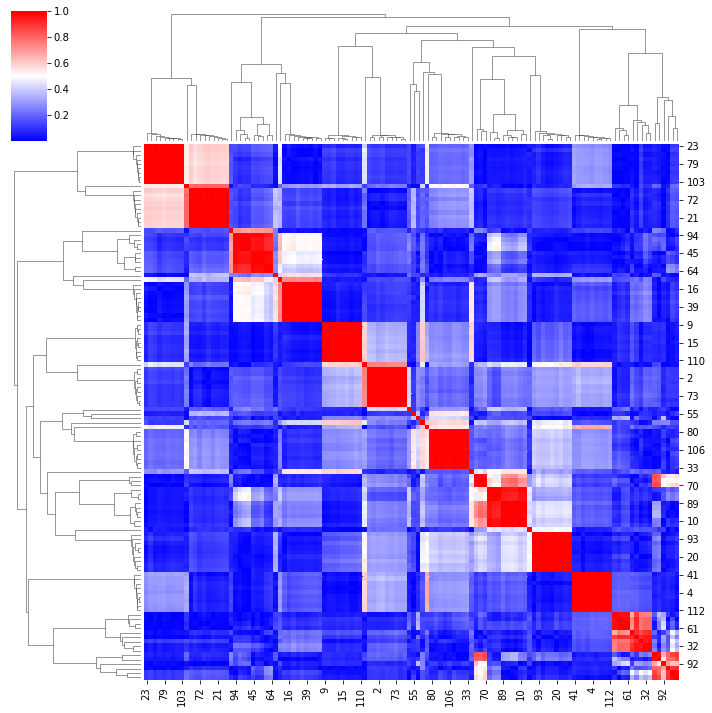

In [46]:
nodes=12
commonname='Big12Hexaco79Layer1DecoderReluCopy'
#commonname='Big10Hexaco78Layer1DecoderReluCopy'
#commonname='Big10Hexaco240Layer1DecoderReluCopy'
#commonname='Big8Hexaco85Layer1DecoderReluCopy'
commonsub='-FactorLoadings.csv'

factors=[]
for i in range(0,nodes):
    factors.append('F'+str(i))
factor_names=list(factors)   

col_names_all=[]
for i in range(1,11):

  #  print(col_names1)
    col_names=factor_names.copy()
    for k in range(0,nodes):
        col_names[k] = str(i)+col_names[k]
    if(i==0):
        col_names_all=col_names
    else:
        col_names_all=col_names_all+col_names
print(col_names_all)        

file1name1 = commonname+str(1)+commonsub
facLoad=pd.read_csv(file1name1) 
facLoad=facLoad.iloc[:,1:nodes+1]
#index=facLoad.index
print(facLoad)
#Rotate the factors if they haven't been rotaated, otherwise skip this step

#rotator = Rotator()
#facLoadRotate=rotator.fit_transform(facLoad)
facLoadR=pd.DataFrame(facLoad)
for i in range(2,11):
    file1name = commonname+str(i)+commonsub
    currentfacLoad=pd.read_csv(file1name)     
    currentfacLoad=currentfacLoad.iloc[:,1:nodes+1]
    #currentfacLoadRotate=rotator.fit_transform(currentfacLoad)
    #currentfactLoadR=pd.DataFrame(currentfacLoadRotate)
    currentfactLoadR=pd.DataFrame(currentfacLoad)
    facLoadR= pd.concat([facLoadR, currentfactLoadR], ignore_index=True,axis=1)
    #print(facLoad)
#facLoadR.columns=col_names_all
#facLoadR.index=col_random
facLoadR.index=col_keys
print(facLoadR)
loading_corr=facLoadR.corr()   
loading_corr_abs=loading_corr.abs()   
clustergrid=sn.clustermap(loading_corr_abs, cmap='bwr',method='average')

In [47]:
#extracts the indices from the correlation matrix, which are the factors
factors = loading_corr.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(loading_corr_abs)

#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: factors[x])

#shows the edges with their corresponding weights
#G.edges(data=True)


In [48]:
NewG=create_corr_network(G,0.875)
nx.write_graphml(NewG,'graph.graphml') # Export NX graph to file

Gix = ig.read('graph.graphml',format="graphml") 

In [49]:
partition = la.find_partition(Gix, la.ModularityVertexPartition)


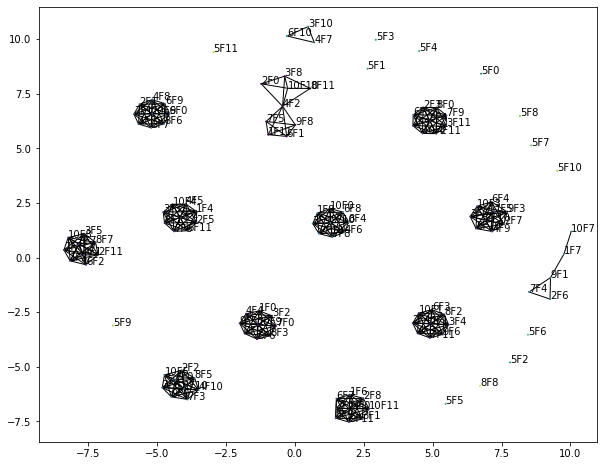

In [50]:
visual_style = {}
visual_style["vertex_size"] = 1
visual_style["vertex_label"] = col_names_all
visual_style["bbox"] = (8000, 8000)
visual_style["margin"] = 400
visual_style["label_size"]=50
fig, ax = plt.subplots(figsize=(10,8))
ig.plot(partition, target=ax,**visual_style)
plt.savefig('Big12Input79DataClusters875.pdf',dpi=400)

In [51]:
print(partition)
factor_df=pd.DataFrame(col_names_all)
lp=len(partition)
for i in range(lp):
    ids=partition[i]
    number_of_factors=len(ids)
    totaln=number_of_factors*number_of_factors
    totaln2=totaln-number_of_factors
    factorNames=factor_df.iloc[ids]
    print(factorNames)
    #print(ids)
    loading_reordered=loading_corr.iloc[ids,ids]    
    loading_reordered_abs=loading_reordered.abs()
    print((loading_reordered_abs.mean().mean()*(totaln)-number_of_factors)/totaln2)
    #print(loading_reordered)

Clustering with 120 elements and 26 clusters
[ 0] 11, 12, 32, 38, 61, 77, 95, 104, 118
[ 1] 0, 21, 26, 40, 66, 72, 87, 101, 117
[ 2] 1, 16, 28, 39, 63, 83, 86, 102, 109
[ 3] 3, 23, 29, 37, 62, 79, 91, 103, 116
[ 4] 4, 17, 27, 41, 71, 78, 85, 98, 112
[ 5] 5, 19, 24, 45, 64, 82, 94, 99, 111
[ 6] 6, 20, 25, 36, 67, 74, 93, 107, 119
[ 7] 9, 15, 35, 47, 65, 81, 84, 100, 110
[ 8] 2, 13, 31, 44, 69, 73, 90, 96, 114
[ 9] 10, 14, 30, 46, 60, 75, 89, 105, 113
[10] 8, 22, 33, 42, 68, 80, 88, 106, 108
[11] 7, 18, 76, 97, 115
[12] 34, 43, 70
[13] 48
[14] 49
[15] 50
[16] 51
[17] 52
[18] 53
[19] 54
[20] 55
[21] 56
[22] 57
[23] 58
[24] 59
[25] 92
         0
11    1F11
12     2F0
32     3F8
38     4F2
61     6F1
77     7F5
95    8F11
104    9F8
118  10F10
0.8625239102723347
        0
0     1F0
21    2F9
26    3F2
40    4F4
66    6F6
72    7F0
87    8F3
101   9F5
117  10F9
0.99736437659963
        0
1     1F1
16    2F4
28    3F4
39    4F3
63    6F3
83   7F11
86    8F2
102   9F6
109  10F1
0.9977731163052

/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/jianqiuzhang/opt/miniconda3/envs/